In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df= pd.read_csv(r'D:\Aniket\TE Mini Project\european_soccer.csv')
X = df.iloc[:,:-1].values
Y = df.iloc[:,14].values

In [3]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,FTR
0,Standard,Waregem,1,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
1,Anderlecht,Eupen,4,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
2,Kortrijk,Club Brugge,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
3,Mechelen,Lokeren,2,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
4,St Truiden,Lierse,1,0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55501,Parma,Genoa,5,1,3.0,0.0,15.0,11.0,7.0,6.0,9.0,12.0,3.0,7.0,H
55502,Milan,Lecce,2,2,1.0,0.0,18.0,11.0,8.0,7.0,13.0,12.0,8.0,2.0,D
55503,Bochum,Karlsruhe,3,3,3.0,2.0,19.0,18.0,7.0,6.0,14.0,11.0,5.0,7.0,D
55504,Sassuolo,Inter,3,4,1.0,3.0,7.0,10.0,4.0,7.0,14.0,17.0,5.0,7.0,A


In [4]:
#taking care of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X[:, 2:14])
X[:, 2:14] = imputer.transform(X[:, 2:14])

In [5]:
from sklearn import preprocessing
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [6]:
X

array([['Standard', 'Waregem', 1, ..., 12.0, 5.0, 4.0],
       ['Anderlecht', 'Eupen', 4, ..., 12.0, 5.0, 4.0],
       ['Kortrijk', 'Club Brugge', 1, ..., 12.0, 5.0, 4.0],
       ...,
       ['Bochum', 'Karlsruhe', 3, ..., 11.0, 5.0, 7.0],
       ['Sassuolo', 'Inter', 3, ..., 17.0, 5.0, 7.0],
       ['Marseille', 'Strasbourg', 2, ..., 15.0, 5.0, 7.0]], dtype=object)

In [7]:
Y

array([1, 2, 2, ..., 1, 0, 2])

In [6]:
df['FTR']=labelencoder_Y.fit_transform(df['FTR'])

In [11]:
df

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,FTR
0,1,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1,0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55501,5,1,3.0,0.0,15.0,11.0,7.0,6.0,9.0,12.0,3.0,7.0,2
55502,2,2,1.0,0.0,18.0,11.0,8.0,7.0,13.0,12.0,8.0,2.0,1
55503,3,3,3.0,2.0,19.0,18.0,7.0,6.0,14.0,11.0,5.0,7.0,1
55504,3,4,1.0,3.0,7.0,10.0,4.0,7.0,14.0,17.0,5.0,7.0,0


In [7]:
df=df.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=1)

In [18]:
df

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,FTR
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55501,5.0,1.0,3.0,0.0,15.0,11.0,7.0,6.0,9.0,12.0,3.0,7.0,2.0
55502,2.0,2.0,1.0,0.0,18.0,11.0,8.0,7.0,13.0,12.0,8.0,2.0,1.0
55503,3.0,3.0,3.0,2.0,19.0,18.0,7.0,6.0,14.0,11.0,5.0,7.0,1.0
55504,3.0,4.0,1.0,3.0,7.0,10.0,4.0,7.0,14.0,17.0,5.0,7.0,0.0


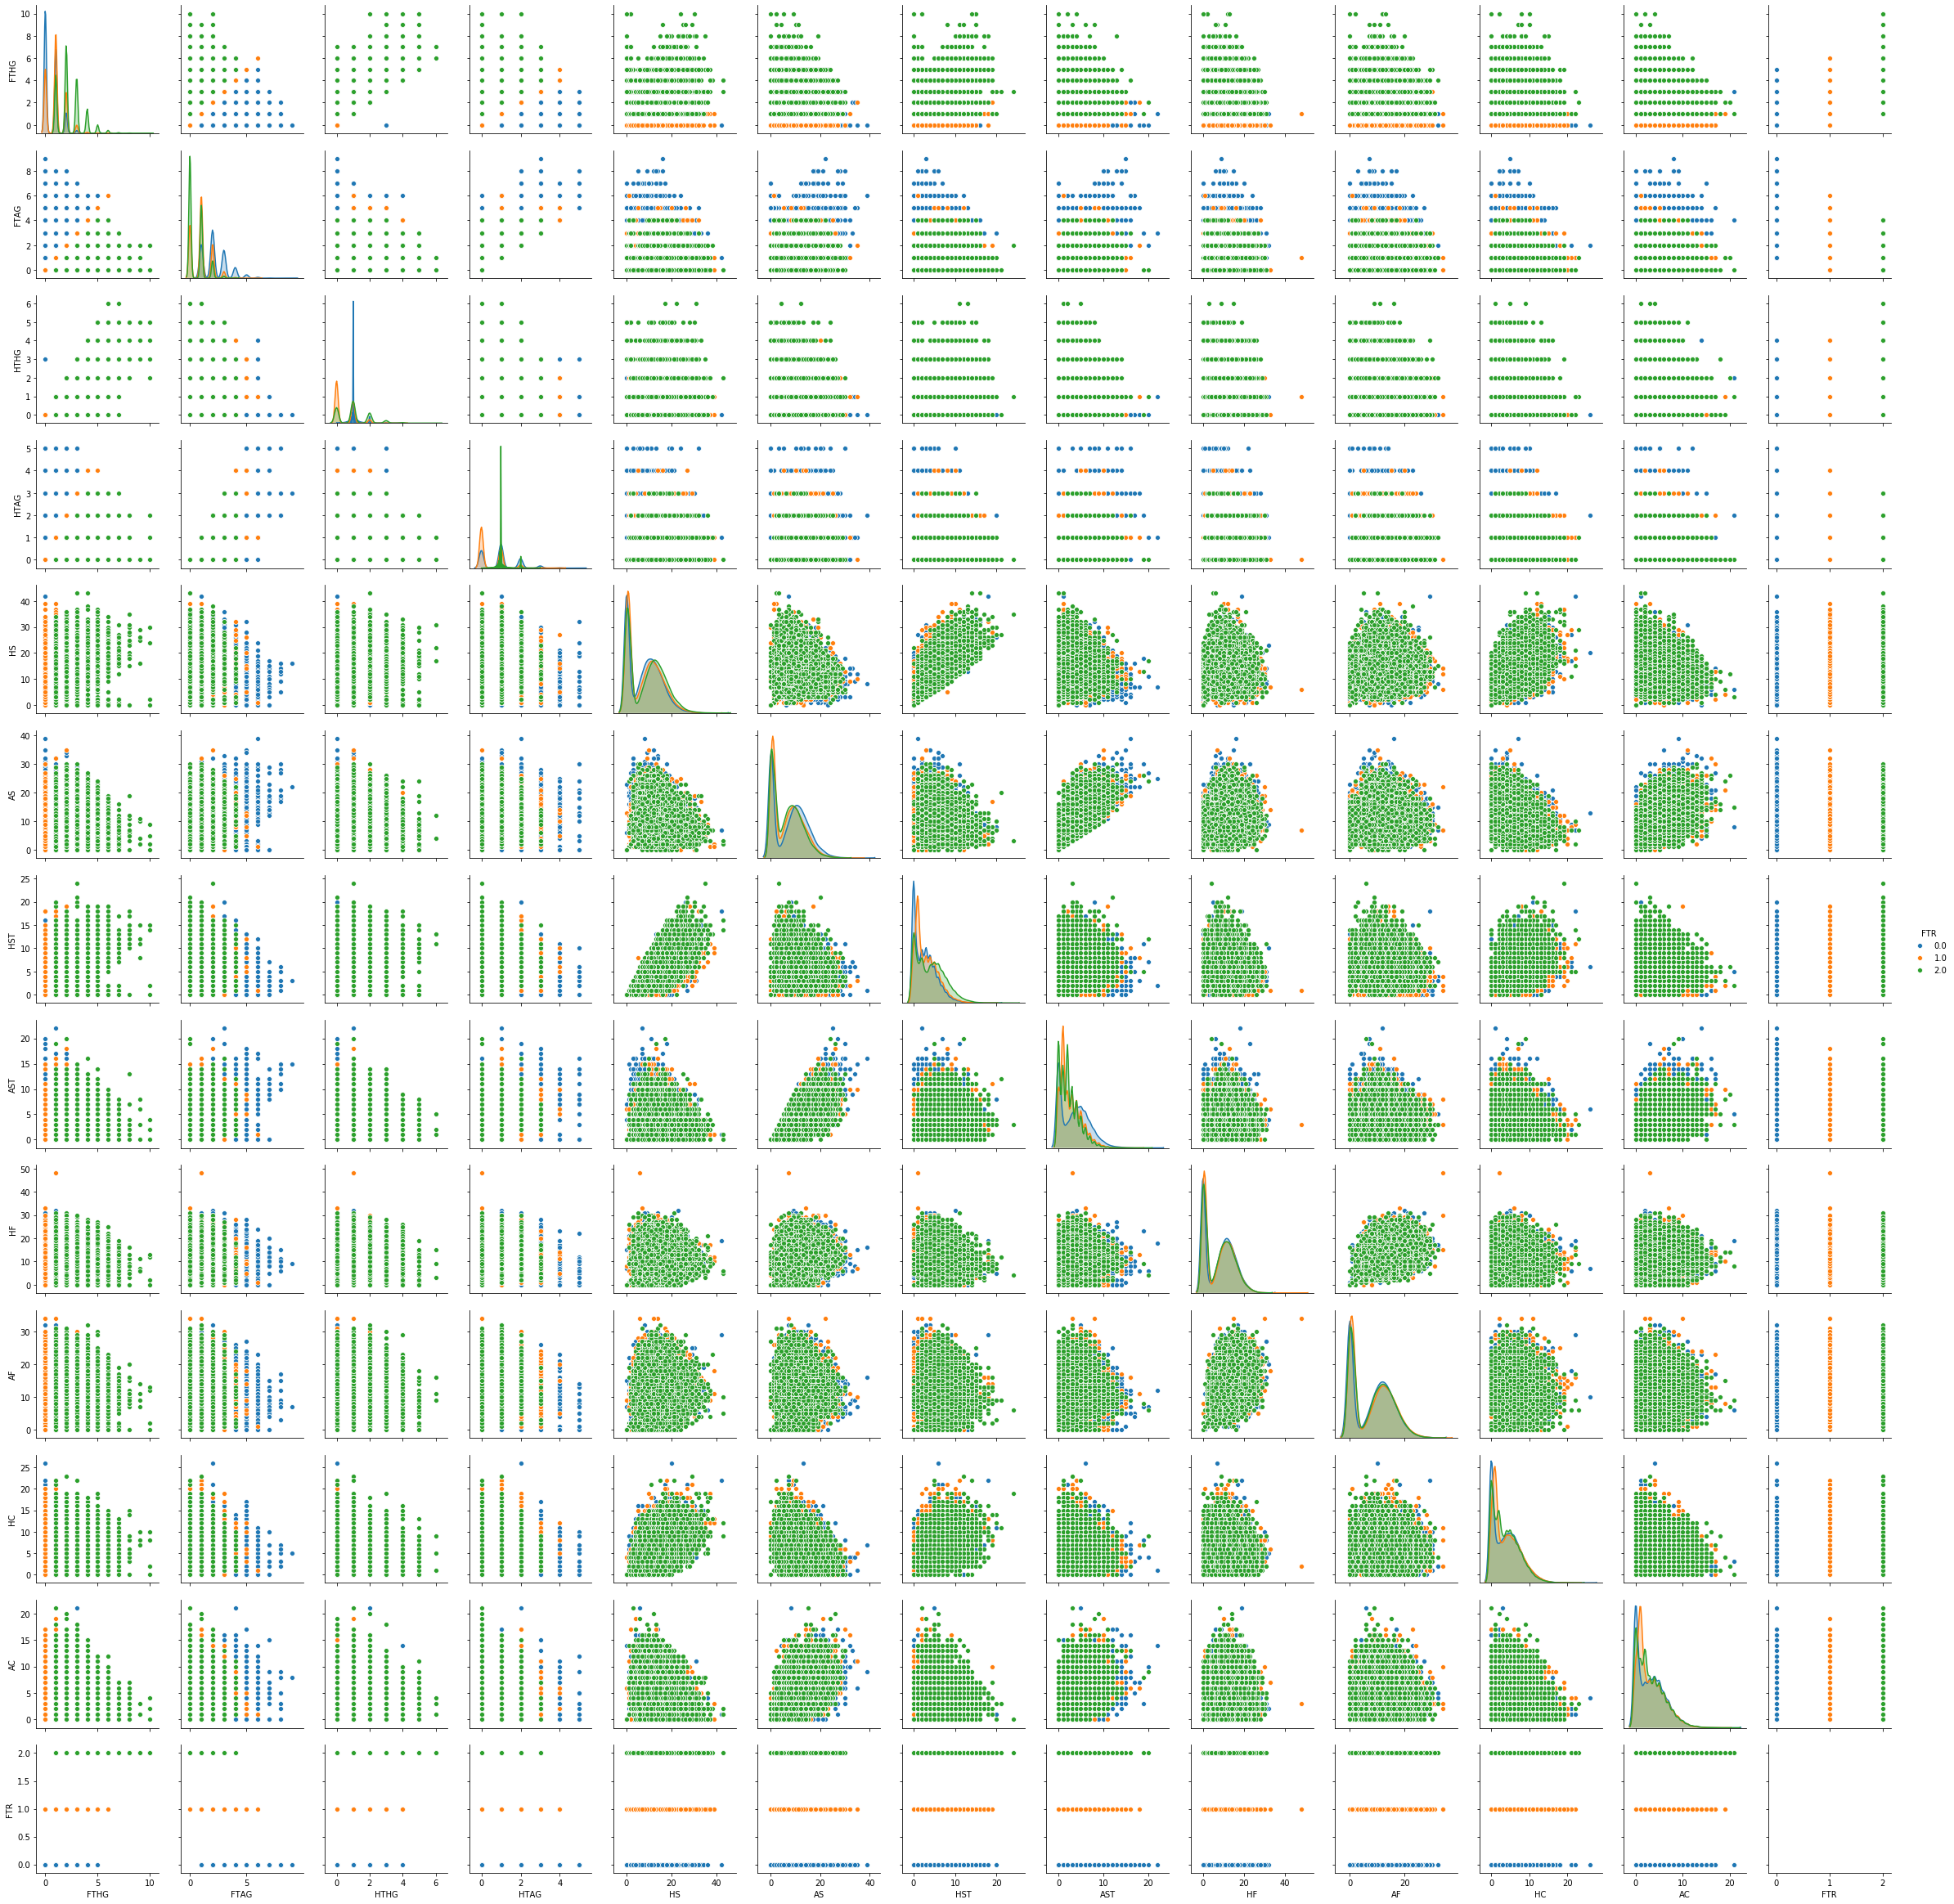

In [19]:
g = sns.pairplot(df, hue='FTR')

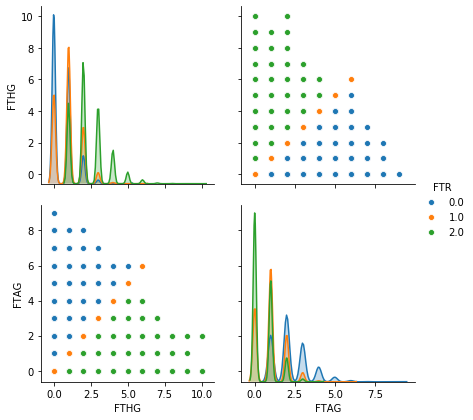

In [20]:
g = sns.pairplot(df, hue = 'FTR',height=3, vars = ['FTHG','FTAG'])

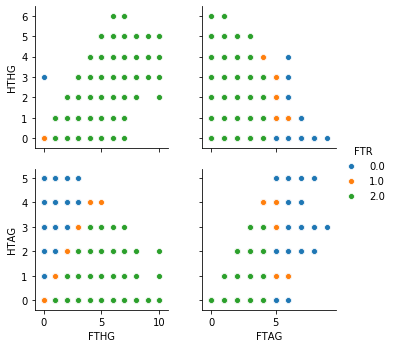

In [21]:
g = sns.pairplot(df, hue='FTR', x_vars=['FTHG','FTAG'], y_vars = ['HTHG','HTAG'])

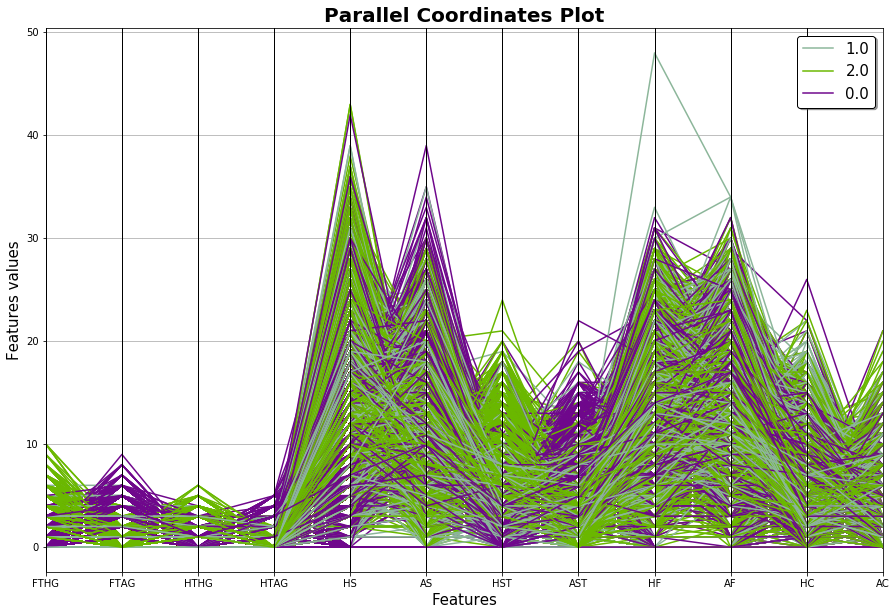

In [22]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(frame= df,class_column="FTR")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [8]:
Y.astype(int)

array([1, 2, 2, ..., 1, 0, 2])

In [14]:
X=X.astype(int)

## Train test split

In [15]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## KNearest Neighbour classifier

In [16]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21, metric = 'euclidean', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([2, 1, 0, ..., 2, 1, 2])

In [14]:
Y_test

array([2, 1, 0, ..., 2, 0, 0])

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[2562  388  187]
 [ 465 1755  694]
 [  86  360 4605]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3137
           1       0.70      0.60      0.65      2914
           2       0.84      0.91      0.87      5051

    accuracy                           0.80     11102
   macro avg       0.79      0.78      0.78     11102
weighted avg       0.80      0.80      0.80     11102



C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


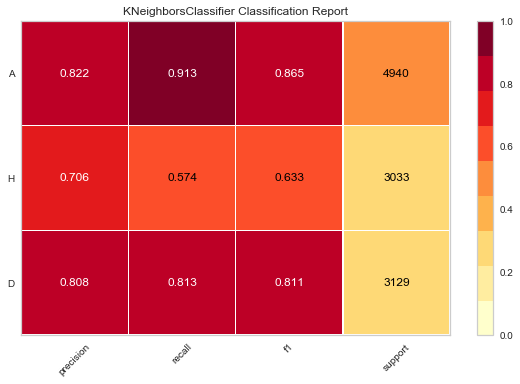

In [16]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy


classes = ["D","H", "A"]


visualizer = ClassificationReport(classifier, classes=classes, support=True)

visualizer.fit(X_train, Y_train)        # Fit the visualizer and the model
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randomclassifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
y_predrfc = randomclassifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_predrfc))
print(classification_report(Y_test,y_predrfc))

[[3132    5    0]
 [   4 2908    2]
 [   1    6 5044]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3137
           1       1.00      1.00      1.00      2914
           2       1.00      1.00      1.00      5051

    accuracy                           1.00     11102
   macro avg       1.00      1.00      1.00     11102
weighted avg       1.00      1.00      1.00     11102



## Support Vector Classifier

In [29]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
y_predsvc = svc_classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_predsvc))
print(classification_report(Y_test,y_predsvc))

[[3137    0    0]
 [   0 2914    0]
 [   0    0 5051]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3137
           1       1.00      1.00      1.00      2914
           2       1.00      1.00      1.00      5051

    accuracy                           1.00     11102
   macro avg       1.00      1.00      1.00     11102
weighted avg       1.00      1.00      1.00     11102



## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 5)
LR_classifier.fit(X_train, Y_train)

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_predLR = LR_classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_predLR))
print(classification_report(Y_test,y_predLR))

[[3137    0    0]
 [   0 2914    0]
 [   0    0 5051]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3137
           1       1.00      1.00      1.00      2914
           2       1.00      1.00      1.00      5051

    accuracy                           1.00     11102
   macro avg       1.00      1.00      1.00     11102
weighted avg       1.00      1.00      1.00     11102



## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [37]:
y_predDTC = DTC_classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,y_predDTC))
print(classification_report(Y_test,y_predDTC))

[[3137    0    0]
 [   0 2914    0]
 [   0    0 5051]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3137
           1       1.00      1.00      1.00      2914
           2       1.00      1.00      1.00      5051

    accuracy                           1.00     11102
   macro avg       1.00      1.00      1.00     11102
weighted avg       1.00      1.00      1.00     11102

